# Skeleton plot
Copyright 2024 F. Hoffmann-La Roche AG

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.

In [6]:
import seaborn as sns
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as patches

# Define file paths and plotting parameters

In [19]:
experiment_path = '/path/to/experiment/folder' 
results_path = '/path/to/the/user-defined/results/directory' # Directory where the image will be saved
groups_to_plot = ['V', 'D3']
colors = ['#8A9295', '#D36CA5']
beam = 'wideSquare'
figure_size = (20,6)

## Plotting the skeleton

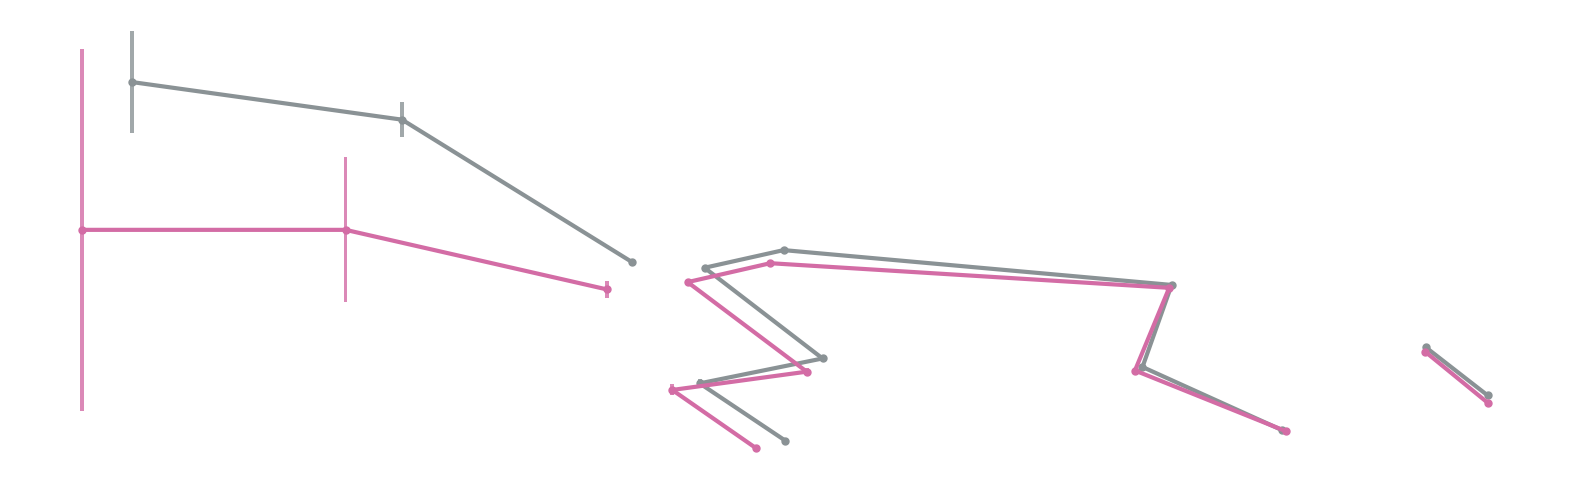

In [20]:
# Load the feature data from csv
path = os.path.join(experiment_path, 'Results', beam, 'feature_df.csv')
feat_df = pd.read_csv(path, header=[0])
df = feat_df.copy()

# Define the body parts to be analyzed
bodyparts = ['nose', 
             'eye', 
             'frontPaw', 
             'elbow', 
             'shoulder', 
             'knee', 
             'hip',
             'hindPaw', 
             'iliacCrest', 
             'ankle', 
             'tailBase', 
             'tailMiddle', 
             'tailTip']

# Initialize the dataframes for storing distance and angle calculations
distance_df = pd.DataFrame(columns=['bodyparts', 'dist', 'treat'])
angle_df = pd.DataFrame(columns=['bodyparts', 'angle', 'treat'])

fig, ax = plt.subplots(figsize=figure_size)

# Initialize the dataframes for storing various metrics
y_positions = pd.DataFrame()
y_min = pd.DataFrame()
y_max = pd.DataFrame()
var = pd.DataFrame()
distances = pd.DataFrame()
x_positions = pd.DataFrame()
dst_min = pd.DataFrame()
dst_max = pd.DataFrame()

# Loop over each group to calculate the metrics and plot
for treat in groups_to_plot:
    m_y = []
    mi_y = []
    ma_y = []
    di = []
    var_l = []
    x = []
    min_dst = []
    max_dst = []
    
    # Filter the dataframe for the chosen group and beam
    t_df = df[(df.group_name == treat) & (df.beam == beam)]
    mean_df = t_df.mean(numeric_only=True).to_frame().T
    ref = 'nose'
    
    # Calculate the metrics for each body part
    for i in range(len(bodyparts)):
        bp1 = bodyparts[i]
        
        mean_d_n = bp1 + 'mean_y'
        min_d_n = bp1 + 'min_y'
        max_d_n = bp1 + 'max_y'
        var_d_n = bp1 + 'var_y'
        
        m_y.append(mean_df[mean_d_n].values[0])
        mi_y.append(mean_df[min_d_n].values[0])
        ma_y.append(mean_df[max_d_n].values[0])
        var_l.append(mean_df[var_d_n].values[0])
    
        name = bp1 + '_' + ref + '_mean_dst'
        
        
        if name in mean_df.columns:
            c = mean_df[name].values[0]
            
            a = abs(mean_df[mean_d_n].values[0] - mean_df[ref + 'mean_y'].values[0])
            b = math.sqrt(c**2 - a**2)
            x.append(-b)
            
            min_name = bp1 + '_' + ref + '_min_dst'
            min_dist = mean_df[min_name].values[0]
            
            max_name = bp1 + '_' + ref + '_max_dst'
            max_dist = mean_df[max_name].values[0]
            
            min_dst.append(min_dist)
            max_dst.append(max_dist)
            
        else:
            name = ref + '_' + bp1 + '_mean_dst'
            if name in mean_df.columns:
                c = mean_df[name].values[0]
                a = abs(mean_df[mean_d_n].values[0] - mean_df[ref + 'mean_y'].values[0])
                b = math.sqrt(c**2 - a**2)
                
                # if bp1 in ['nose', 'eye', 'frontPaw', 'shoulder']:
                #     b = -b
                x.append(-b)
                
                min_name = ref + '_' + bp1 + '_min_dst'
                min_dist = mean_df[min_name].values[0]

                max_name = ref + '_' + bp1 + '_max_dst'
                max_dist = mean_df[max_name].values[0]

                min_dst.append(min_dist)
                max_dst.append(max_dist)
                
            else:
                x.append(0)
                min_dst.append(0)
                max_dst.append(0)

    y_positions[treat] = m_y
    y_min[treat] = mi_y
    y_max[treat] = ma_y
    x_positions[treat] = x
    var[treat] = var_l
    dst_min[treat] = min_dst
    dst_max[treat] = max_dst

# Define pairs of body parts for distance calculations
pairs = [('nose', 'eye'),
         ('frontPaw', 'elbow'), 
         ('elbow', 'shoulder'), 
         ('shoulder', 'iliacCrest'), 
         ('iliacCrest', 'hip'), 
         ('hip', 'knee'),
         ('knee', 'ankle'),
         ('ankle', 'hindPaw'),
         ('tailBase', 'tailMiddle'),
         ('tailMiddle', 'tailTip')]  

# Calculate the y coords for each group
for i,t in enumerate(groups_to_plot):
    
    plt.plot(np.array(x_positions[t]), -y_positions[t], 'o', color=colors[i], markersize=5)

    tot_x = x_positions[t]
    tot_y = y_positions[t]
    tot_var = var[t]
    
    for j in range(len(bodyparts)):

            x_t = x_positions[t].values
            y_t = y_positions[t].values
           
            
            min_y = y_min[t].values
            max_y = y_max[t].values
            
            min_d = dst_min[t]
            max_d = dst_max[t]
            
            avg_y = np.mean([min_y[j], max_y[j]])
            
            width = 0.03
            
            height = tot_var[j]*1
            bottom_left_x = tot_x[j] - width / 2
            bottom_left_y = -tot_y[j] - height / 2
            rectangle = patches.Rectangle((bottom_left_x, bottom_left_y), width, height, facecolor=colors[i], alpha=0.8)
            ax.add_patch(rectangle)
            
            
    for pair in pairs:
        part1, part2 = pair
        
        index_1 = bodyparts.index(part1)
        index_2 = bodyparts.index(part2)
        
        p1 = np.array([tot_x[index_1], tot_y[index_1]])
        p2 = np.array([tot_x[index_2], tot_y[index_2]])
        d = np.linalg.norm(p1 - p2)
        column_name = part1 + '_' + part2
        distance_df.loc[len(distance_df)] = [column_name, d, t]

        ax.plot([p1[0], p2[0]], 
                [-p1[1], -p2[1]], 
                color=colors[i], linewidth=3)

    # Define the angles that need to be calculate
    imp_angles = ['frontPaw_elbow_shoulder', 'hindPaw_ankle_knee', 'ankle_knee_hip', 'knee_hip_iliacCrest']
        
    for ang in imp_angles:
        bps = ang.split('_')
        index_1 = bodyparts.index(bps[0])
        index_2 = bodyparts.index(bps[1])
        index_3 = bodyparts.index(bps[2])
        p1 = np.array([tot_x[index_1], tot_y[index_1]])
        p2 = np.array([tot_x[index_2], tot_y[index_2]])
        p3 = np.array([tot_x[index_3], tot_y[index_3]])
        AB = p2 - p1
        BC = p3 - p2
        dot_product = np.dot(AB, BC)
        norms = np.linalg.norm(AB) * np.linalg.norm(BC)
        angle_rad = np.arccos(dot_product / norms)
        angle_deg = np.degrees(angle_rad)
        angle_df.loc[len(angle_df)] = [ang, angle_deg, t]
        
sns.despine()
plt.axis('off')

# Save the figure
file_name = 'test_skel.svg'
plt.savefig(os.path.join(results_path, file_name), bbox_inches='tight')


plt.show()

